In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from pprint import pprint
now = datetime.datetime.now()
owmapi_key = "ce9f00814163f822807d8dc2f59f0252"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# API call:
# http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID={APIKEY}
# Parameters:
# APPID {APIKEY} is your unique API key 
# Example of API call:
# api.openweathermap.org/data/2.5/forecast?id=524901&APPID=1111111111

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


638

## Perform API Calls

In [59]:
# # Name = []
# # Cloudiness = []
# # Country = []
# # Date = []
# # Humidity = []
# # Latitude = []
# # Longitude = []
# # Temperature = []
# # Wind_Speed = []
# # OpenWeatherMap API Key
# api_key = owmapi_key
# selection = np.random.randint(low=0, high=len(cities))
# # Starting URL for Weather Map API Call
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
# #for city in cities:
# query_url = url + "&q=" + cities[selection]
# # Get weather data
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

# # Get the temperature from the response
# #pprint(weather_json)
# pprint(f"The weather API for {cities[100]} responded with: ")
# pprint(weather_json)
# #print(api_key)
# #weather_data = [ow.get_current(city, **settings) for city in cities] 
# # summary = ["main.temp_max", "coord.lat", "coord.lon", "clouds.all", "wind.speed", "sys.country", "dt", "main.humidity", "name"] Saved for later
# #sumlist = ["name", "clouds.all", "sys.country", "dt", "main.humidity", "coord.lat", "coord.lon", "main.temp_max", "wind.speed"]


'The weather API for aswan responded with: '
{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 27.69, 'lon': -105.17},
 'dt': 1538476386,
 'id': 4013724,
 'main': {'grnd_level': 877.74,
          'humidity': 76,
          'pressure': 877.74,
          'sea_level': 1027.82,
          'temp': 63.75,
          'temp_max': 63.75,
          'temp_min': 63.75},
 'name': 'Camargo',
 'sys': {'country': 'MX',
         'message': 0.0041,
         'sunrise': 1538484852,
         'sunset': 1538527501},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 138.004, 'speed': 5.17}}


In [3]:
Name = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Latitude = []
Longitude = []
Temperature = []
Wind_Speed = []
api_key = owmapi_key
selection = np.random.randint(low=0, high=len(cities))
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
#for city in cities:
query_url = url + "&q=" + cities[selection]
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()
for city in range(len(cities)):
    query_url = url + "&q=" + cities[city]
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    Name.append(weather_json['name'])
    Cloudiness.append(weather_json["clouds"]["all"])
    Country.append(weather_json["sys"]["country"])
    Date.append(weather_json["dt"])
    Humidity.append(weather_json["main"]["humidity"])
    Latitude.append(weather_json["coord"]["lat"])
    Longitude.append(weather_json["coord"]["lon"])
    Temperature.append(weather_json["main"]["temp_max"])
    Wind_Speed.append(weather_json["wind"]["speed"])
#print(len(Name))
#sumlist = ["name", "clouds.all", "sys.country", "dt", "main.humidity", "coord.lat", "coord.lon", "main.temp_max", "wind.speed"]
print(len(Name))

KeyError: 'name'

In [5]:
weather_json['name']
# cities[0]
# for i in range(len(cities)):
#     print (cities[i])

KeyError: 'name'

In [6]:
weather_json["main"]["humidity"]

KeyError: 'main'

In [4]:
print(len(Name))
print(len(Cloudiness))
print(len(Country))
print(len(Humidity))
print(len(Latitude))
print(len(Longitude))
print(len(Temperature))
print(len(Wind_Speed))
#pprint(f"The weather API for {cities[100]} responded with: ")
#pprint(weather_json)

5
5
5
5
5
5
5
5


In [6]:
#print(Name)
#print(Cloudiness)
#print(Country)
# print(Humidity[100])
# print(Latitude[100])
# print(Longitude[100])
# print(Temperature[100])
# print(Wind_Speed[100])
#Humidity = [i/100 for i in Humidity]
#Name

['Ribeira Grande', 'Okitipupa', 'Busselton', 'Severo-Kurilsk', 'San Patricio']
[20, 76, 92, 92, 92]
['PT', 'NG', 'AU', 'RU', 'PY']


In [42]:
#labels = ["City Name", "Cloudiness", "Country", "Humidity(%)", "Latitude", "Longitude", "Temperature", "Wind Speed"]
#sset = [Longitude, Temperature, Wind_Speed]
weather_df = pd.DataFrame(Name)
#weather_df.index.name = "City Name"
weather_df.reset_index()
weather_df.columns = ["City Name"]
weather_df["Cloudiness"] = Cloudiness
weather_df["Country"] = Country
weather_df["Humidity"] = Humidity
weather_df["Latitude"] = Latitude
weather_df["Longitude"] = Longitude
weather_df["Temperature"] = Temperature
weather_df["Wind Speed"] = Wind_Speed
weather_df.head()


,City Name,Cloudiness,Country,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,Ribeira Grande,20,PT,69,38.52,-28.70,77.00,9.17
1,Okitipupa,76,NG,85,6.50,4.78,81.22,4.76
2,Busselton,92,AU,100,-33.64,115.35,60.43,25.46
3,Severo-Kurilsk,92,RU,96,50.68,156.12,49.09,12.48
4,San Patricio,92,PY,92,-26.98,-56.83,66.55,5.21


In [45]:
weather_df.to_csv(output_data_file, encoding='utf-8')

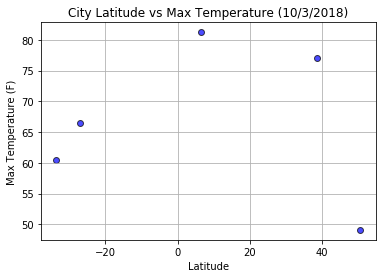

In [64]:
plt.scatter(Latitude, Temperature, marker='o', alpha=0.7, c="blue", edgecolor='black')
plt.title('City Latitude vs Max Temperature (' + str(now.month) + "/" + str(now.day) +"/" +str(now.year)+")")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b=True, which='both', axis='both')
plt.savefig("output_data/LativsTemp.png")

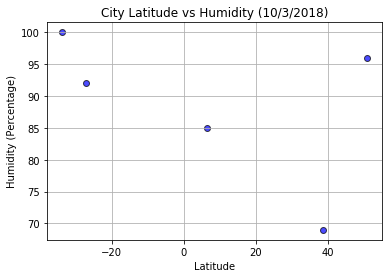

In [60]:
plt.scatter(Latitude, Humidity, marker='o', alpha=0.7, c="blue", edgecolor='black')
plt.title('City Latitude vs Humidity (' + str(now.month) + "/" + str(now.day) +"/" +str(now.year)+")")
plt.xlabel('Latitude')
plt.ylabel('Humidity (Percentage)')
plt.grid(b=True, which='both', axis='both')
plt.savefig("output_data/LativsHumi.png")

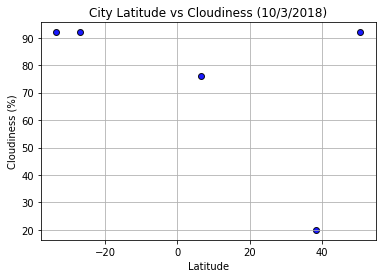

In [63]:
plt.scatter(Latitude, Cloudiness, marker='o', alpha=0.9, c="blue", edgecolor='black')
plt.title('City Latitude vs Cloudiness (' + str(now.month) + "/" + str(now.day) +"/" +str(now.year)+")")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True, which='both', axis='both')
plt.savefig("output_data/LativsClouds.png")

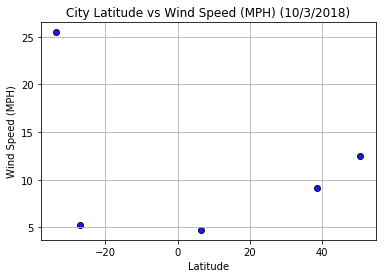

In [62]:
plt.scatter(Latitude, Wind_Speed, marker='o', alpha=0.9, c="blue", edgecolor='black')
plt.title('City Latitude vs Wind Speed (MPH) (' + str(now.month) + "/" + str(now.day) +"/" +str(now.year)+")")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.grid(b=True, which='both', axis='both')
plt.savefig("output_data/LativsWindMPH.png")